# Колодин Матевей. Вариант 5

## Задание № 1.1.5

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [101]:
def calculate_partial_sum(N):
    """ Вычисление частичной суммы ряда. """
    return sum(48 / (5 * (n**2 + 6*n + 5)) for n in range(N + 1))

def compute_error(true_sum, estimated_sum):
    """ Вычисление абсолютной погрешности. """
    return np.abs(true_sum - estimated_sum)

def count_significant_figures(true_sum, estimated_sum):
    """ Определение количества значащих цифр. """
    error = np.abs(true_sum - estimated_sum)
    if error == 0:
        return 'Бесконечно'
    precision = -int(np.floor(np.log10(error)))
    return min(precision, len(str(true_sum)))

def count_significant_figures_v2(true_sum, approx_sum):
    """ Определение количества значащих цифр. """
    # Случай разных знаков
    if true_sum * approx_sum < 0:
        return 0
    
    # Получение антей и мантисс для обоих чисел, с обработкой отсутствия дробной части
    true_sum, approx_sum = str(abs(true_sum)), str(abs(approx_sum))
    antie_true, mantissa_true = (true_sum.split('.')[0], true_sum.split('.')[1]) if '.' in true_sum else (true_sum, '0')
    antie_approx, mantissa_approx = (approx_sum.split('.')[0], approx_sum.split('.')[1]) if '.' in approx_sum else (approx_sum, '0')
    
    # Проверка на разные антей
    if len(antie_true) != len(antie_approx):
        return 0
    
    # Сравнение антей
    antie_index = 0
    while antie_index < min(len(antie_true), len(antie_approx)) and antie_true[antie_index] == antie_approx[antie_index]:
        antie_index += 1
    
    if antie_index < len(antie_true) and antie_true[antie_index] != antie_approx[antie_index]:
        # Если антей не совпадают, возвращаем количество совпавших цифр до первого несовпадения
        return antie_index
    
    # Сравнение мантисс, если антей полностью совпадают
    mantissa_index = 0
    while mantissa_index < min(len(mantissa_true), len(mantissa_approx)) and mantissa_true[mantissa_index] == mantissa_approx[mantissa_index]:
        print(mantissa_index)
        print(mantissa_true[mantissa_index], mantissa_approx[mantissa_index])
        mantissa_index += 1
    
    return antie_index + mantissa_index

def count_significant_figures_v3(true_sum, approx_sum):
    """ Определение количества значащих цифр. """
    # Случай разных знаков
    if true_sum * approx_sum < 0:
        return 0
    
    true_sum, approx_sum = abs(true_sum), abs(approx_sum)
   # Получение значащих цифр в абсолютной погрешности
    absolute_error = compute_error(true_sum, approx_sum)
    count = 0
    for symb in format(compute_error(true_sum, approx_sum), '.10f').replace('.', ''):
        if symb == '0':
            count += 1
        else:
            if symb == '1':
                count += 1
            break
    
    # int(np.floor(np.log10(approx_sum))) - количество нулевых цифр в начале через десятичный логарифм
    print(approx_sum, (np.floor(np.log10(approx_sum))))
    return abs(count - int(np.floor(np.log10(approx_sum))))
            

0
0
0
0
0


Text(0.5, 1.0, 'Результаты суммирования ряда и анализ погрешности')

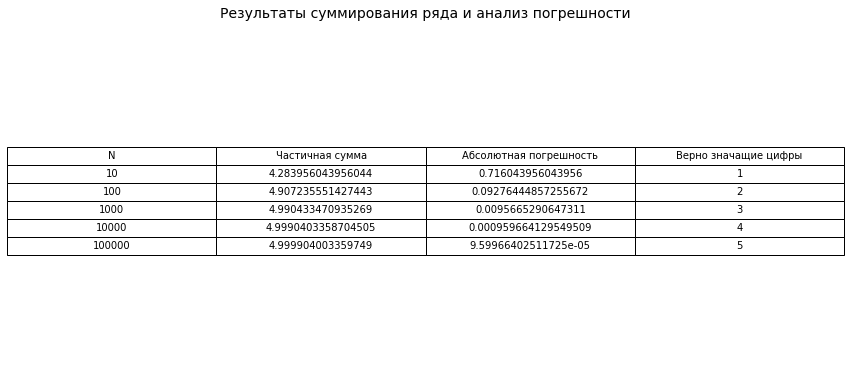

In [99]:
# Запрос точного значения суммы ряда от пользователя
exact_sum = float(input("Введите точную сумму ряда: "))

# Задаем значения N для расчета
N_values = [10, 100, 1000, 10000, 100000]

results = []

for N in N_values:
    partial_sum = calculate_partial_sum(N)
    error = compute_error(exact_sum, partial_sum)
    sig_figs = count_significant_figures_v3(exact_sum, partial_sum)
    results.append([N, partial_sum, error, sig_figs])

# Вывод результатов в виде таблицы
fig, ax = plt.subplots(figsize=(10, 6))
column_labels = ['N', 'Частичная сумма', 'Абсолютная погрешность', 'Верно значащие цифры']

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results, colLabels=column_labels, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

plt.title('Результаты суммирования ряда и анализ погрешности', fontsize=14, pad=20)

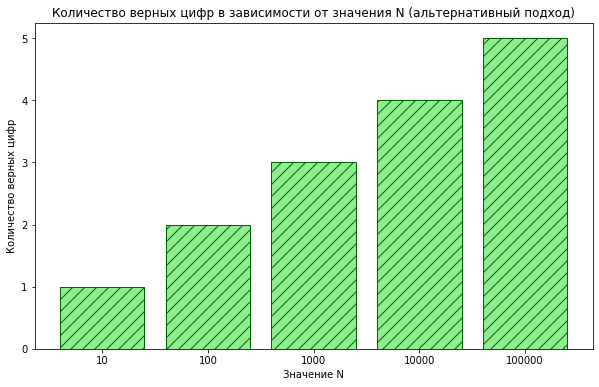

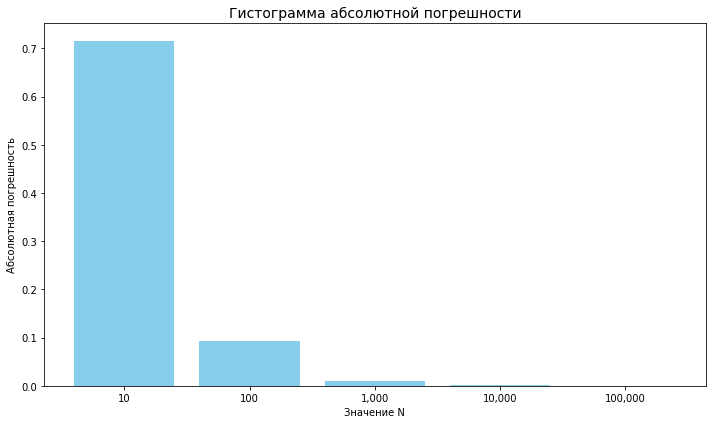

In [86]:
# Визуализация результатов
significant_digits_results = [result[3] for result in results]
plt.figure(figsize=(10, 6))
plt.bar(range(len(N_values)), significant_digits_results, color='lightgreen', edgecolor='darkgreen', hatch='//')
plt.xlabel('Значение N')
plt.ylabel('Количество верных цифр')
plt.title('Количество верных цифр в зависимости от значения N (альтернативный подход)')
plt.xticks(range(len(N_values)), N_values)
plt.show()

# Добавим гистограмму для абсолютной погрешности
fig, ax = plt.subplots(figsize=(10, 6))
errors = [row[2] for row in results]  # Извлекаем абсолютные погрешности
ax.bar(range(len(N_values)), errors, color='skyblue')
ax.set_title('Гистограмма абсолютной погрешности', fontsize=14)
ax.set_xlabel('Значение N')
ax.set_ylabel('Абсолютная погрешность')
ax.set_xticks(range(len(N_values)))
ax.set_xticklabels(['10', '100', '1,000', '10,000', '100,000'])

plt.tight_layout()
plt.show()

## Задание 1.2.2

Дана матрица A. В каждый из диагональных элементов матрицы A по
очереди внести погрешность в 1%. Как изменился определитель матрицы А? 
Указать количество верных цифр и вычислить величину относительной погрешности определителя в каждом случае.

859.279999999987 2.0


Text(0.5, 1.0, 'Результаты суммирования ряда и анализ погрешности')

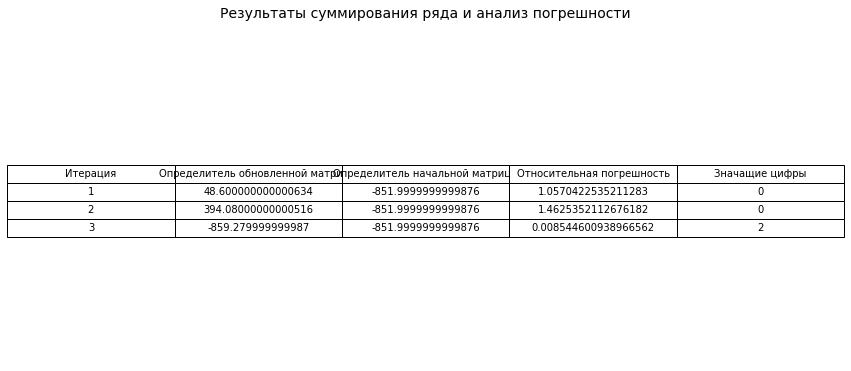

In [102]:
import numpy as np

# Создание матрицы A размером 3x3
A = np.array([[30., 34., 19.],
              [314., 354., 200.],
              [2., 8., 13.]])

# Вычисление определителя матрицы A
det_A = np.linalg.det(A)

# Создадим функцию для вычисления относительной погрешности
def relative_error(true_value, approx_value):
    return abs((true_value - approx_value) / true_value)

# Изменение диагональных элементов и вычисление новых определителей
results = []
for i in range(A.shape[0]):
    A_modified = A.copy()
    A_modified[i, i] = A_modified[i, i] * 1.01  # Внесение погрешности в 1%
    det_modified = np.linalg.det(A_modified)
    error = relative_error(det_A, det_modified)
    digits = count_significant_figures_v3(det_A, det_modified)
    results.append([i+1, det_modified, det_A, error, digits])


# Вывод результатов в виде таблицы
fig, ax = plt.subplots(figsize=(10, 6))
column_labels = ['Итерация', 'Определитель обновленной матрицы', 'Определитель начальной матрицы', 'Относительная погрешность','Значащие цифры']

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results, colLabels=column_labels, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

plt.title('Результаты суммирования ряда и анализ погрешности', fontsize=14, pad=20)

## Задание № 1.7


In [14]:
float32_machine_epsilon = np.finfo(np.float32).eps
float32_machine_zero = np.finfo(np.float32).tiny
float32_machine_infinity = np.finfo(np.float32).max

float64_machine_epsilon = np.finfo(np.float64).eps
float64_machine_zero = np.finfo(np.float64).tiny
float64_machine_infinity = np.finfo(np.float64).max

print("Float Machine Zero:", float32_machine_zero)
print("Float Machine Epsilon:", float32_machine_epsilon)
print("Float Machine Infinity:", float32_machine_infinity)

print("Double Machine Zero:", float64_machine_zero)
print("Double Machine Epsilon:", float64_machine_epsilon)
print("Double Machine Infinity:", float64_machine_infinity)

Float Machine Zero: 1.1754944e-38
Float Machine Epsilon: 1.1920929e-07
Float Machine Infinity: 3.4028235e+38
Double Machine Zero: 2.2250738585072014e-308
Double Machine Epsilon: 2.220446049250313e-16
Double Machine Infinity: 1.7976931348623157e+308


# Задание № 1.10.5


In [8]:
# Задаем вектора:
v1 = np.array([14, 4, 17])
v2 = np.array([33.9, 23.9, 38])
v3 = np.array([13, 3, 16])

vectors = [v1, v2, v3]

In [10]:
# Для понимания того, компланарны вектора или нет, необходимо понять, равен ли дискриминант нулю.
# Создаем соответствующую функцию на проверку компланарности тройки векторов

def coplanar_check(vectors, show=False):
    """ Функция для определения компланарности трех векторов """
    # Формируем матрицу, где каждая строка - это координаты вектора
    matrix = np.array(vectors)
    
    # Векторы компланарны, если определитель равен нулю
    result = abs(np.linalg.det(matrix))
    if show:
        print('Компланарны' if abs(np.linalg.det(matrix)) == 0 else 'Не компланарны')
    return result == 0 


### Случай 1. Вектора заданы точно

In [12]:
coplanar_check(vectors, show=True)

Не компланарны


False

### Случай 2. Вектора заданы с погрешностями

In [22]:
def generate_matrices_with_error(a1, a2, a3, error_rate):
    """
    Генерирует все возможные матрицы, изменяя элементы исходных векторов a1, a2, a3
    в пределах заданной относительной погрешности.
    """
    # Генерация всех комбинаций относительных изменений для каждого элемента
    adjustments = [1 - error_rate, 1 + error_rate]
    all_combinations = []

    # Итерация по всем элементам каждого вектора
    for i in adjustments:
        for j in adjustments:
            for k in adjustments:
                for l in adjustments:
                    for m in adjustments:
                        for n in adjustments:
                            for o in adjustments:
                                for p in adjustments:
                                    for q in adjustments:
                                        # Создание новой матрицы с учетом погрешности
                                        new_matrix = np.array([
                                            a1 * np.array([i, j, k]),
                                            a2 * np.array([l, m, n]),
                                            a3 * np.array([o, p, q])
                                        ])
                                        all_combinations.append(new_matrix)
    return all_combinations

def find_min_max_determinants(matrices):
    """
    Находит минимальный и максимальный определители среди всех матриц.
    """
    determinants = [np.linalg.det(matrix) for matrix in matrices]
    return min(determinants), max(determinants)

# Генерация матриц с учетом погрешности 5% и 10%
matrices_5_percent = generate_matrices_with_error(v1, v2, v3, 0.05)
matrices_10_percent = generate_matrices_with_error(v1, v2, v3, 0.10)

# Инициализация переменных для хранения минимального абсолютного значения определителя и соответствующих матриц
min_det_value_5 = float('inf')
matrix_with_min_det_5 = None

min_det_value_10 = float('inf')
matrix_with_min_det_10 = None

# Перебор всех матриц с погрешностью 5% и поиск матрицы с определителем, наиболее близким к нулю
for matrix in matrices_5_percent:
    current_det = np.linalg.det(matrix)
    if abs(current_det) < min_det_value_5:
        min_det_value_5 = abs(current_det)
        matrix_with_min_det_5 = matrix

# Перебор всех матриц с погрешностью 10% и поиск матрицы с определителем, наиболее близким к нулю
for matrix in matrices_10_percent:
    current_det = np.linalg.det(matrix)
    if abs(current_det) < min_det_value_10:
        min_det_value_10 = abs(current_det)
        matrix_with_min_det_10 = matrix

# Нахождение минимального и максимального определителей для обеих погрешностей
min_det_5, max_det_5 = find_min_max_determinants(matrices_5_percent)
min_det_10, max_det_10 = find_min_max_determinants(matrices_10_percent)

print(f"Для погрешности в 5% минимальные и максимальные значения определителя равны: {min_det_5} и {max_det_5} соответственно")
print(f"Матрица с определителем, наиболее близким к нулю, при погрешности 5%:\n {matrix_with_min_det_5}")

print(f"Для погрешности в 10% минимальные и максимальные значения определителя равны: {min_det_10} и {max_det_10} соответственно")
print(f"Матрица с определителем, наиболее близким к нулю, при погрешности 10%:\n {matrix_with_min_det_10}")


Для погрешности в 5% минимальные и максимальные значения определителя равны: -801.5899500000008 и 819.4456500000015 соответственно
Матрица с определителем, наиболее близким к нулю, при погрешности 5%:
 [[13.3    3.8   16.15 ]
 [32.205 22.705 36.1  ]
 [13.65   2.85  16.8  ]]
Для погрешности в 10% минимальные и максимальные значения определителя равны: -1751.6936000000005 и 1769.2951999999987 соответственно
Матрица с определителем, наиболее близким к нулю, при погрешности 10%:
 [[15.4   3.6  18.7 ]
 [30.51 21.51 41.8 ]
 [11.7   3.3  14.4 ]]
